In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from icecream import ic

In [3]:

from utils import process_data
data, info = process_data('data-agg', drop_ingeborg=False)

p_grouped = data.groupby('person')
c_grouped = data.groupby('coin')

n_people = p_grouped['N_throws'].sum().count()
n_coin = c_grouped['N_throws'].sum().count()

ic(n_coin)
ic(n_people)

ic| n_coin: np.int64(44)
ic| n_people: np.int64(48)


np.int64(48)

      heads_heads  tails_heads  N_start_heads_up  N_start_tails_up  same_side  \
2615           30           19                49                51         62   
2616           32           24                56                44         52   
2617           47           17                64                36         66   
2618           30           21                51                49         58   
2619           30           21                50                50         59   
2620           29           20                49                51         60   
2621           18           29                47                53         42   
2622           31           20                52                48         59   
2623           24           20                45                55         59   
2624           22           19                41                59         62   
2625           37           11                48                52         78   
2626           26           

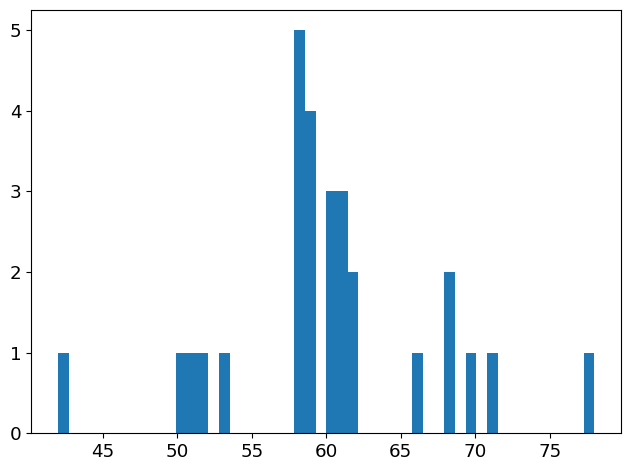

In [16]:
data, info = process_data('df-time-agg', drop_ingeborg=False)

p_grouped = data.groupby('person')

# TianqiPeng     JoycePang
tianqi = p_grouped.get_group('TianqiPeng')
print(tianqi)

plt.figure()
h = plt.hist(tianqi['same_side'], bins=50)

ic| ind: array([37, 41, 42, 46])
ic| ind: array([ 0,  1,  3,  5,  6, 11, 14, 17, 21, 22, 26, 27, 29, 34, 35, 36, 37,
                41, 43])


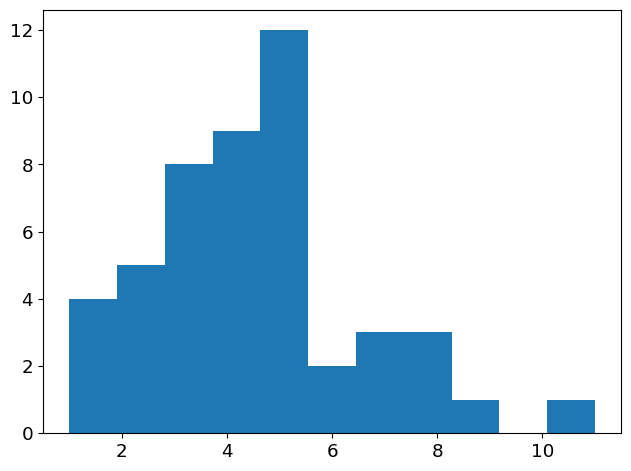

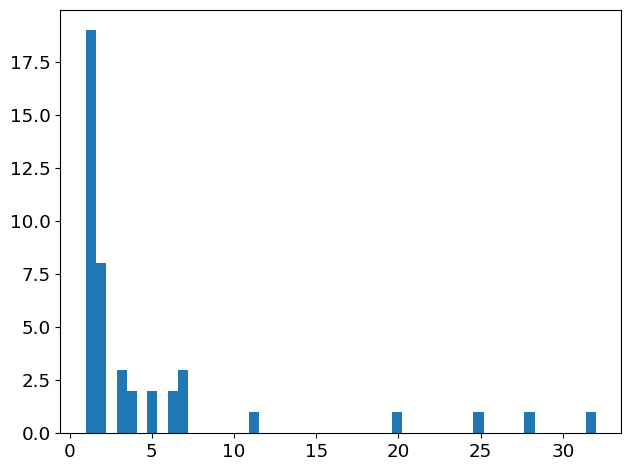

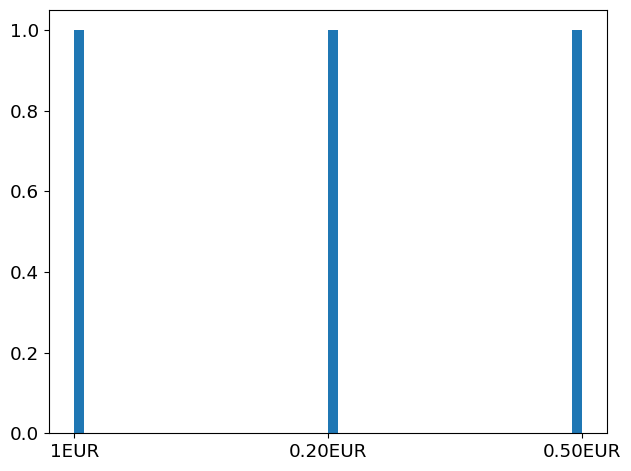

In [4]:

ind = np.where(p_grouped['coin'].count() == 1)[0]
ic(ind)

ind = np.where(c_grouped['person'].count() == 1)[0]
ic(ind)

plt.figure()
h = plt.hist(p_grouped['coin'].count(), bins=11)

plt.figure()
h = plt.hist(c_grouped['person'].count(), bins=50)



Text(0.5, 1.0, 'Histogram of c_p_N_throws')

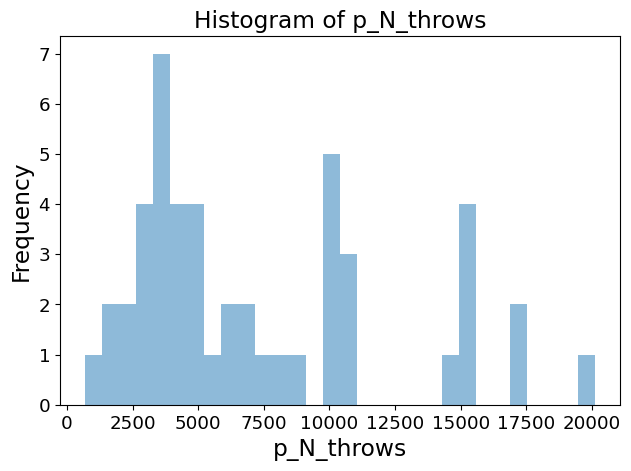

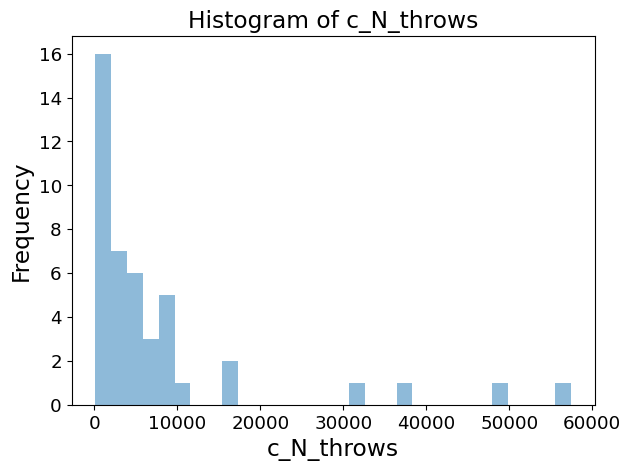

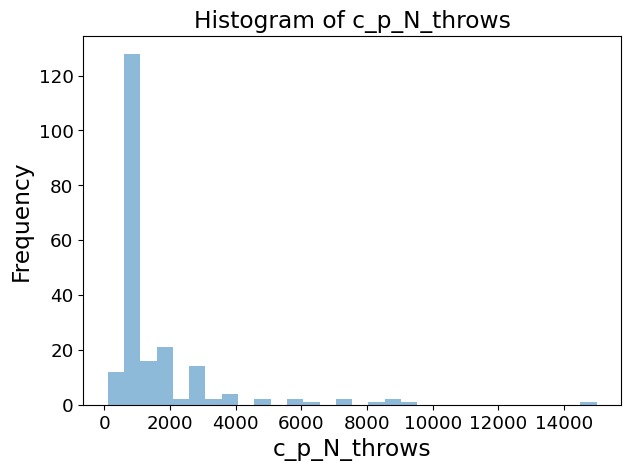

In [5]:
p_N_throws = p_grouped['N_throws'].sum()

plt.figure()
plt.hist(p_N_throws, bins=30, alpha=0.5)
plt.xlabel('p_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of p_N_throws')

c_N_throws = c_grouped['N_throws'].sum()
plt.figure()
plt.hist(c_N_throws, bins=30, alpha=0.5)
plt.xlabel('c_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of c_N_throws')

c_p_N_throws = data.groupby(['coin', 'person'])['N_throws'].sum()
plt.figure()
plt.hist(c_p_N_throws, bins=30, alpha=0.5)
plt.xlabel('c_p_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of c_p_N_throws')




Text(0.5, 1.0, 'Person success rate with error bars')

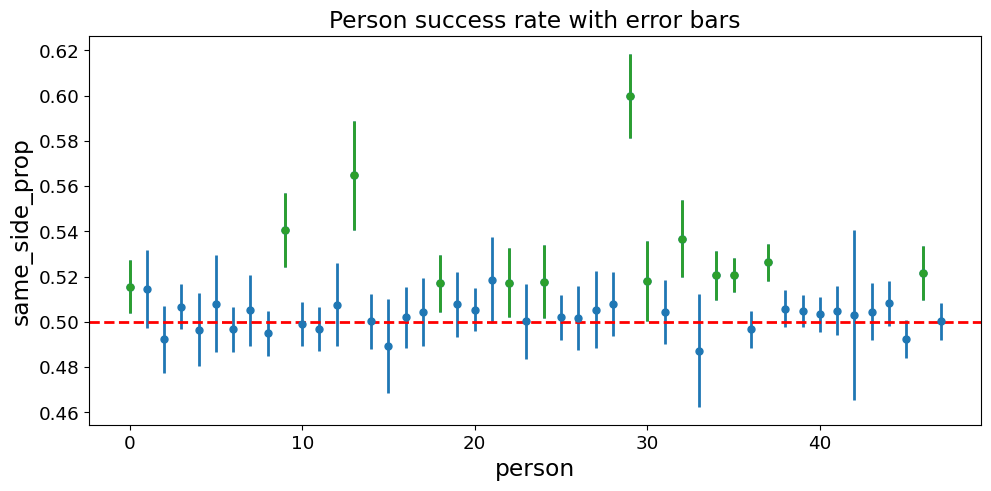

In [6]:
def prop_to_plot( groups ):
    data_g = data.groupby(groups).sum(numeric_only=True)
    h_h, t_t, N_h, N_t = data_g['heads_heads'], data_g['tails_tails'], data_g['N_start_heads_up'], data_g['N_start_tails_up']
    prop = (h_h / N_h + t_t / N_t) / 2
    prop_err = np.sqrt( prop * (1 - prop) / (N_h + N_t) )
    x_axis = np.arange(prop.size)
    plt.errorbar( x_axis, prop, yerr=2*prop_err, fmt='o')
    outliers = np.abs( 0.5 - prop ) > 2*prop_err
    plt.errorbar( x_axis[outliers], prop[outliers], color='tab:green', fmt='o', yerr=2*prop_err[outliers])
    plt.axhline(y=0.5, color='r', linestyle='--')
    return

plt.figure(figsize=(10,5))
prop_to_plot('person')
plt.xlabel('person')
plt.ylabel('same_side_prop')
plt.title('Person success rate with error bars')


Text(0.5, 1.0, 'Coin success rate with error bars')

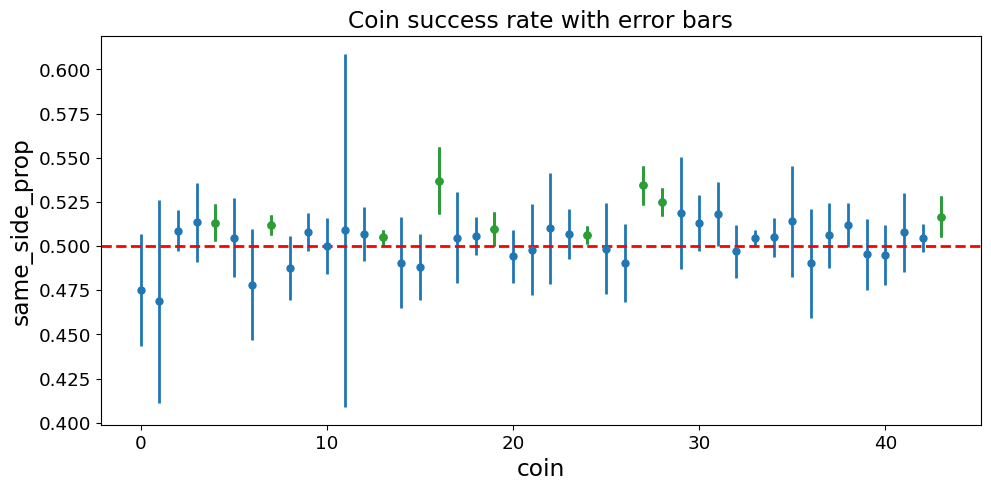

In [7]:
figure = plt.figure(figsize=(10,5))
prop_to_plot( ['coin'] )
plt.xlabel('coin')
plt.ylabel('same_side_prop')
plt.title('Coin success rate with error bars')

Text(0.5, 1.0, 'Person-coin success rate with error bars')

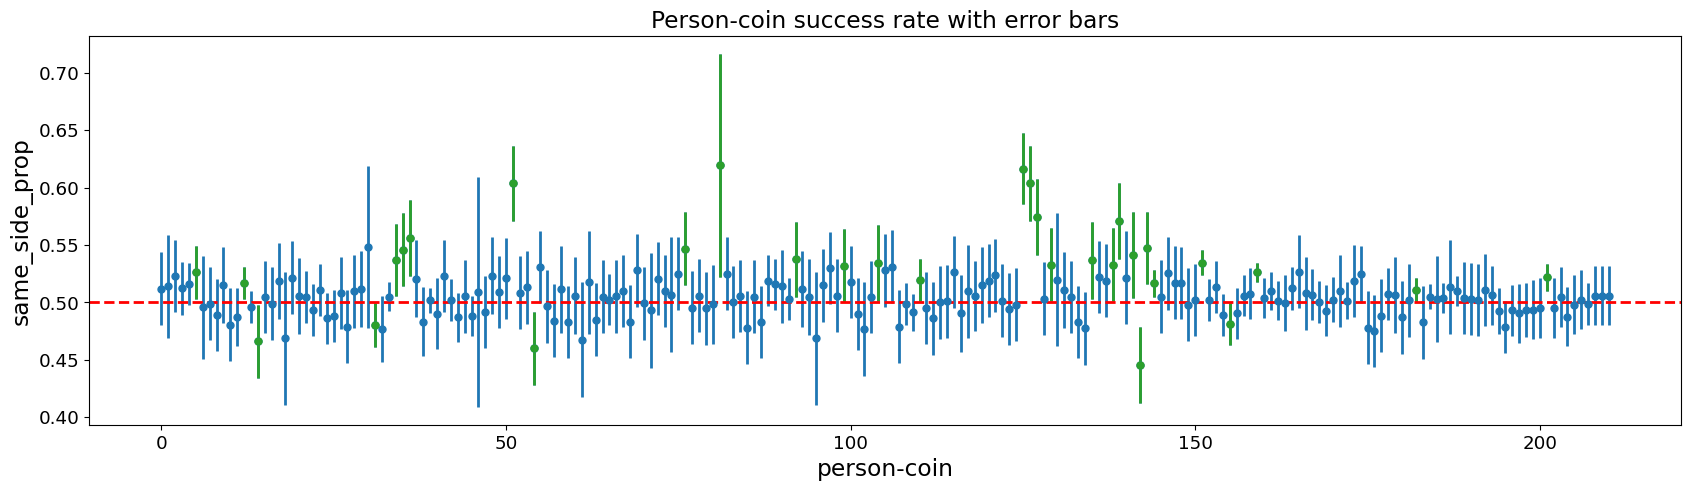

In [8]:

plt.figure(figsize=(17, 5))
prop_to_plot( ['person','coin'] )
plt.xlabel('person-coin')
plt.ylabel('same_side_prop')
plt.title('Person-coin success rate with error bars')


8 8


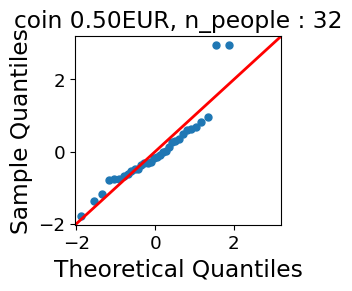

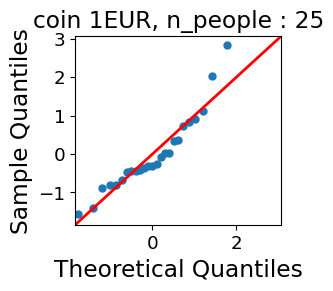

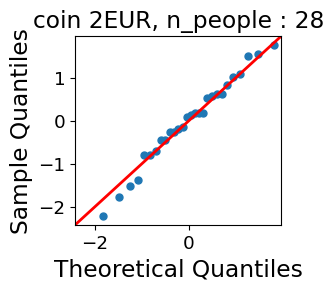

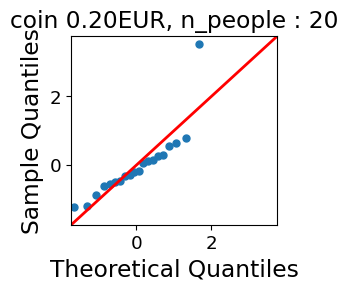

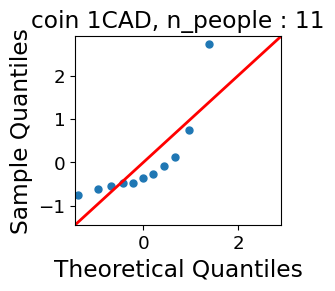

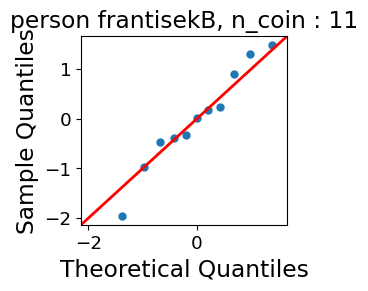

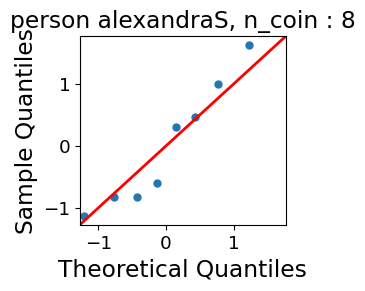

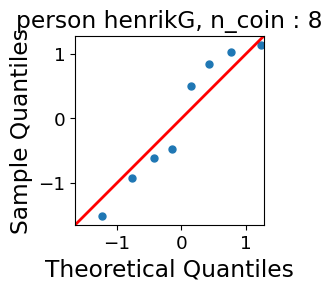

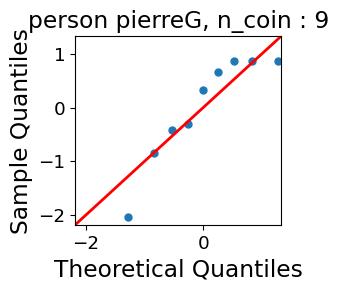

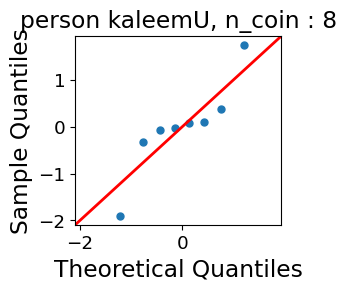

In [9]:
keep_coins = 7
keep_persons = 7

c_grouped_filt = data.groupby('coin').filter(lambda x: x['person'].count() >= keep_coins)
c_res = c_grouped_filt['coin'].unique()
p_grouped_filt = data.groupby('person').filter(lambda x: x['coin'].count() >= keep_persons)
p_res = p_grouped_filt['person'].unique()

print(len(c_res), len(p_res))



# get coins with at least 10 people who flipped them
c_grouped_filt = c_grouped.filter(lambda x: x['person'].count() >= 10)
for coin in c_grouped_filt['coin'].unique():
    data_filt = c_grouped_filt[c_grouped_filt['coin'] == coin]
    #data_coin = data_filt[data_filt['coin'] == coin]
    rates = data_filt['same_side'] / data_filt['N_throws']
    rates -= rates.mean()
    rates /= rates.std()
    fig, ax = plt.subplots(figsize=(3,3))
    sm.qqplot(rates, line='45', ax=ax)
    plt.title(f'coin {coin}, n_people : {rates.size}')
    plt.show()


# get people with at least 8 coins they flipped
p_grouped_filt = p_grouped.filter(lambda x: x['coin'].count() >= 8)
for person in p_grouped_filt['person'].unique():
    data_filt = p_grouped_filt[p_grouped_filt['person'] == person]
    #data_coin = data_filt[data_filt['coin'] == coin]
    rates = data_filt['same_side'] / data_filt['N_throws']
    rates -= rates.mean()
    rates /= rates.std()
    fig, ax = plt.subplots(figsize=(3,3))
    sm.qqplot(rates, line='45', ax=ax)
    plt.title(f'person {person}, n_coin : {rates.size}')
    plt.show()

